## Scape all the seach result for a Search Item from amazon

Todo
- Load the chrome web brower by the selenium.webdriver to get a webpages html code
- Request to chrome to open the provided URL
- Scape the all the search result detail:
    1. Product Detail
    2. Product URL
    3. Product Price
    4. Product Star
    5. Product Review Count
- Make a csv file which contain all the seach result product detail

Libraries Used
- BeautifulSoup
- Selenium
- pandas


In [1]:
from bs4 import BeautifulSoup
import pandas as pd

#firefox or chrome
from selenium import webdriver


### Startup the webdriver

In [2]:
#driver = webdriver.Firefox()
driver = webdriver.Chrome()

In [3]:
url="https://www.amazon.in/?ref=icp_country_us"
driver.get(url)

In [4]:
def get_url(search_term):
    """Generate a url from search term"""
    template='https://www.amazon.in/s?k={}&ref=nb_sb_noss_2'
    search_term=search_term.replace(' ','+')
    return template.format(search_term)

In [5]:
url=get_url('ultrawide monitor')
print(url)

https://www.amazon.in/s?k=ultrawide+monitor&ref=nb_sb_noss_2


In [6]:
driver.get(url)

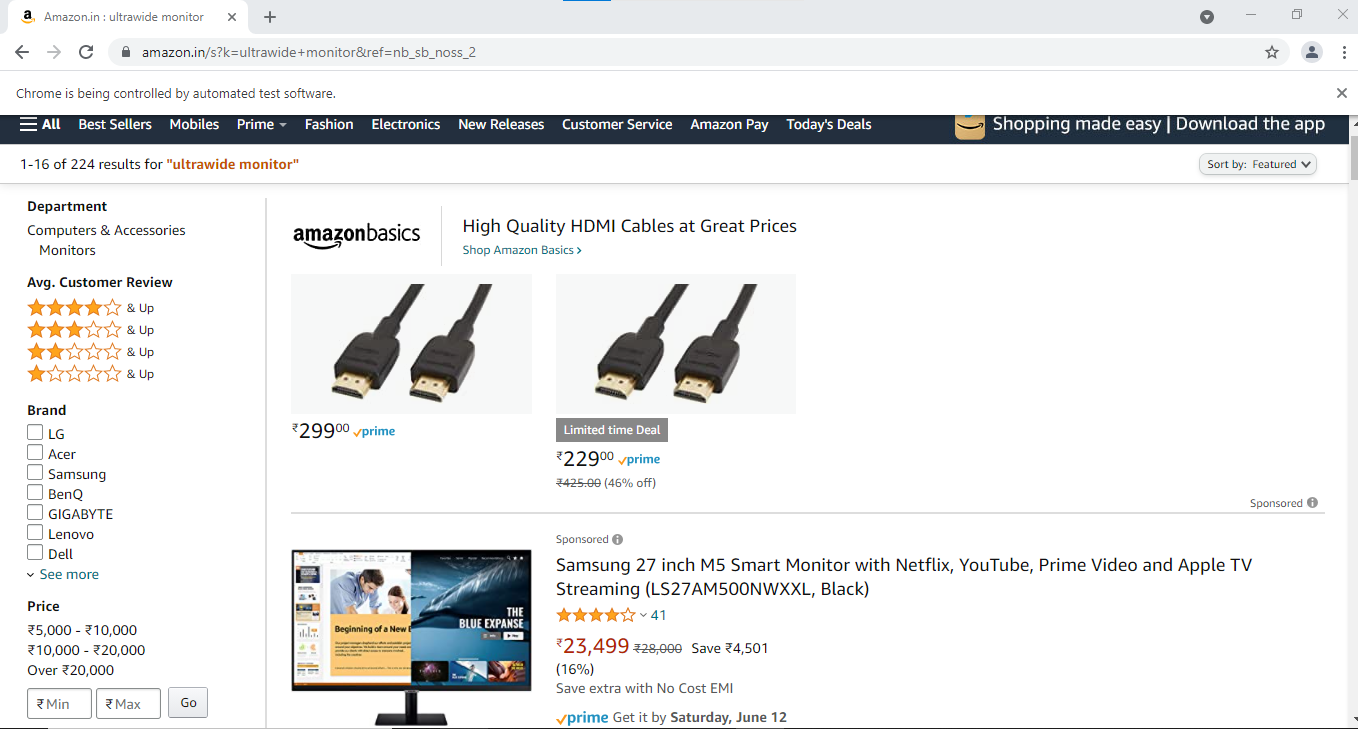

### Extract the collection

In [7]:
#parse the html code by beautifulsoup
soup=BeautifulSoup(driver.page_source,'html.parser')

In [8]:
result=soup.find_all('div',{"data-component-type":"s-search-result"})

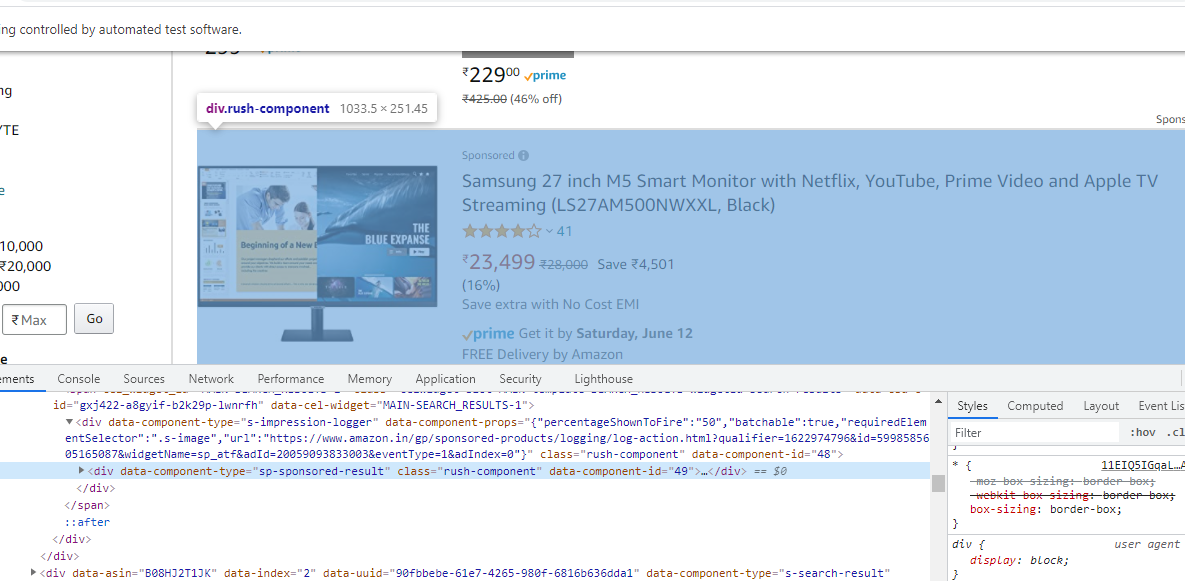

In [9]:
len(result)

22

In [10]:
item=result[0]

In [11]:
atag=item.h2.a

In [12]:
describe=atag.text.strip()

In [13]:
print(describe)

Samsung 27 inch M5 Smart Monitor with Netflix, YouTube, Prime Video and Apple TV Streaming (LS27AM500NWXXL, Black)


In [14]:
url='https://amazon.com'+atag['href']

In [15]:
price=item.find('span',{"class":"a-price-whole"}).text

In [16]:
price

'23,499'

In [17]:
stars=item.i.text

In [18]:
stars

'3.8 out of 5 stars'

In [19]:
review_counts=item.find('span',{"class":"a-size-base"}).text

In [20]:
review_counts

'41'

### Generalize The pattern

In [21]:
def extract_record(item):
    
    atag=item.h2.a
    
    #describe 
    describe=atag.text.strip()
    
    #url
    url='https://www.amazon.in'+atag['href']
    
    #price
    try:
        price=item.find('span',{"class":"a-price-whole"}).text
    except:
        price=0
    
    #stars
    try:
        star=item.i.text
    except:
        star=0
    
    #review_counts
    try:
        review_count=item.find('span',{"class":"a-size-base"}).text
    except:
        review_count=0
    
    t = (describe,url,price,star,review_count)
    return t

def get_url(search_term):
    """Generate a url from search term"""
    template='https://www.amazon.in/s?k={}&ref=nb_sb_noss_2'
    search_term=search_term.replace(' ','+')
    return template.format(search_term)

def each_record(search_item):
    url=get_url(search_item)
    driver=webdriver.Chrome()
    driver.get(url)
    soup=BeautifulSoup(driver.page_source,'html.parser')
    items=soup.find_all('div',{"data-component-type":"s-search-result"})
    
    
    describes=[]
    urls=[]
    prices=[]
    stars=[]
    review_count=[]
    
    for item in items:
        mark=extract_record(item)
        describes.append(mark[0])
        urls.append(mark[1])
        prices.append(mark[2])
        stars.append(mark[3])
        review_count.append(mark[4])
        
    return {"Descrition":describes,"Url":urls,"price":prices,"Stars":stars,"Review Count":review_count}

def get_csv(item):
    
    df=pd.DataFrame(each_record(item))
    df.to_csv('Amazon.csv')
    

## Seach the product:

In [22]:
get_csv("ultrawide monitor")

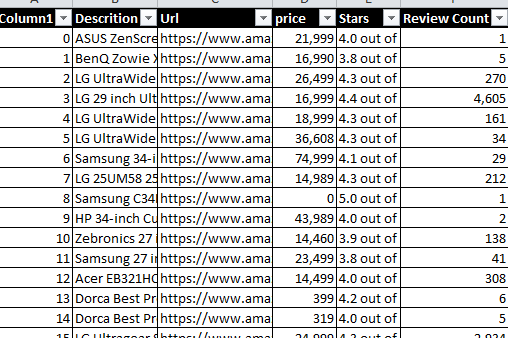